In [1]:
import torch
from torchvision import datasets, transforms
import helper
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.0MB/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 189kB/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.54MB/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 13.6MB/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



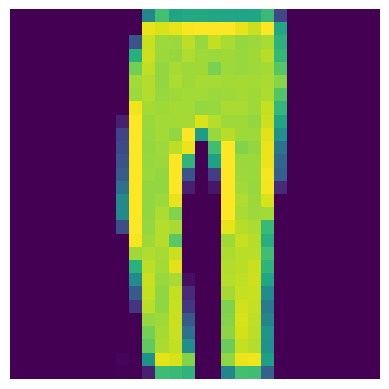

In [3]:
image, label = next(iter(trainloader))

# Convert the tensor to a numpy array and change the shape if necessary
image = image.numpy()[0]  # Take the first image in the batch
image = np.transpose(image, (1, 2, 0))  # Change from (C, H, W) to (H, W, C)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()

In [4]:
from torch import nn, optim
import torch.nn.functional as F

In [5]:
# TODO: Define your network architecture here
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [6]:
# TODO: Create the network, define the criterion and optimizer
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [7]:
epochs = 5

for e in range(epochs):
    running_loss = 0
    for train_images, train_labels in trainloader:
        output = model(train_images)
        loss = criterion(output, train_labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
        
        

Training loss: 0.513062814103642
Training loss: 0.3866465551925621
Training loss: 0.3498332524366343
Training loss: 0.32910000534454137
Training loss: 0.3105140033640714


In [8]:
# Evaluate the model
model.eval()
correct = 0
total = 0
test_loss = 0

with torch.no_grad():
    for test_images, test_labels in testloader:
        output = model(test_images)  # Shape: (batch_size, num_classes)
        loss = criterion(output, test_labels)
        test_loss += loss.item()

        # Get the predicted class indices
        _, predicted = torch.max(output, 1)  # Shape: (batch_size)

        # Update counts
        total += test_labels.size(0)
        correct += (predicted == test_labels).sum().item()

# Calculate accuracy and loss
test_accuracy = 100 * correct / total
test_loss = test_loss / len(testloader)  # Use testloader, not test_loader

print(f'Test Accuracy: {test_accuracy:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

Test Accuracy: 87.22%
Test Loss: 0.3606


In [9]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and its predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze(), cmap='gray_r')
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small')
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()
    plt.show()

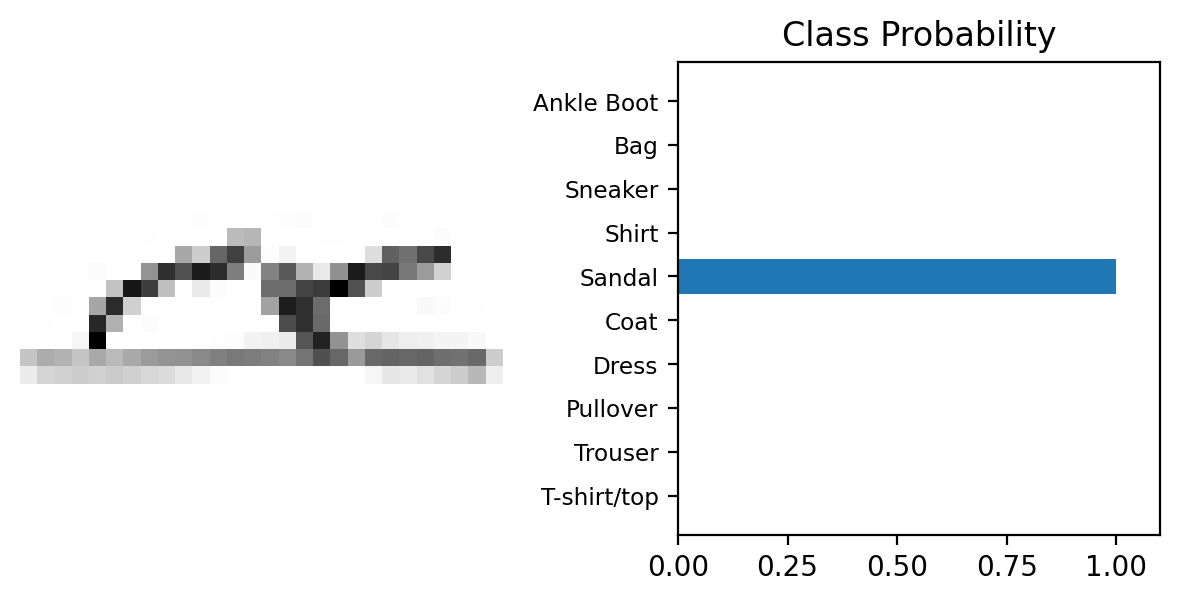

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!
# Assuming testloader is your DataLoader
dataiter = iter(testloader)
images, labels = next(dataiter)  # Use next() instead of .next()
img = images[1]  # Access the second image in the batch

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.softmax(model(img.unsqueeze(0)), dim=1)  # Example predicted probabilities

# Use the custom `view_classify` function
view_classify(img, ps, version='Fashion')